In [139]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from textblob import TextBlob, Word
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# NLP lesson: http://localhost:8888/notebooks/notebooks/07_nlp.ipynb

In [153]:
url = 'data_11_13.csv'
political_lean_data = pd.read_csv(url, encoding='unicode-escape')
political_lean_data.columns = ['url_raw', 'url_clean', 'url_domain', 'text', 'issue', 'political_lean']
political_lean_data.describe()

,url_raw,url_clean,url_domain,text,issue,political_lean
count,27446,27446,27446,23451,27446,27446
unique,27328,26892,357,23116,52,7
top,http://www.allsides.com,procon.org/view.answers.election.php,foxnews.com,if (isIe() && isIe() === 'MSIE') {\n\t\t\t\tdo...,election-2012,Center
freq,10,45,2563,17,6522,9701


In [154]:
political_lean_data.head(5)

,url_raw,url_clean,url_domain,text,issue,political_lean
0,https://www.washingtonpost.com/news/post-natio...,washingtonpost.com/news/post-nation/wp/2016/05...,washingtonpost.com,2 Desktop notifications are ...,abortion,Lean Left
1,http://www.salon.com/2016/04/07/camille_paglia...,salon.com/2016/04/07/camille_paglia_feminists_...,salon.com,\n\n\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t...,abortion,Left
2,http://www.vox.com/2016/3/20/11269226/texas-ab...,vox.com/2016/3/20/11269226/texas-abortion-wome...,vox.com,"\n \n \n\n(function(w,d,s,l,i){w[l]=w[l]...",abortion,Lean Left
3,http://www.huffingtonpost.com/entry/john-kasic...,huffingtonpost.com/entry/john-kasich-planned-p...,huffingtonpost.com,\n\n\n\r\nh2.mp_title { line-height: 1.0; marg...,abortion,Left
4,http://www.wsj.com/articles/hillary-clinton-an...,wsj.com/articles/hillary-clinton-and-donald-tr...,wsj.com,\n\n \n\n \n\n \n\n \n \n ...,abortion,Center


In [155]:
print political_lean_data['text'].isnull().sum()
political_lean_data[political_lean_data['text'].isnull() == True].head()
political_lean_data = political_lean_data[political_lean_data['text'].isnull() == False]
print political_lean_data['text'].isnull().sum()

3995
0


In [156]:
d1 = pd.Series(political_lean_data.political_lean.value_counts())
d2 = pd.Series(political_lean_data.issue.value_counts())
pd.DataFrame(d1)

,political_lean
Center,9436
Right,6438
Left,2544
Lean Left,2480
Lean Right,2326
Mixed,118
Not rated,109


In [157]:
pd.DataFrame(d2).head()

,issue
election-2012,5701
middle-east,1460
healthcare-0,1394
commerce,1277
immigration,1121


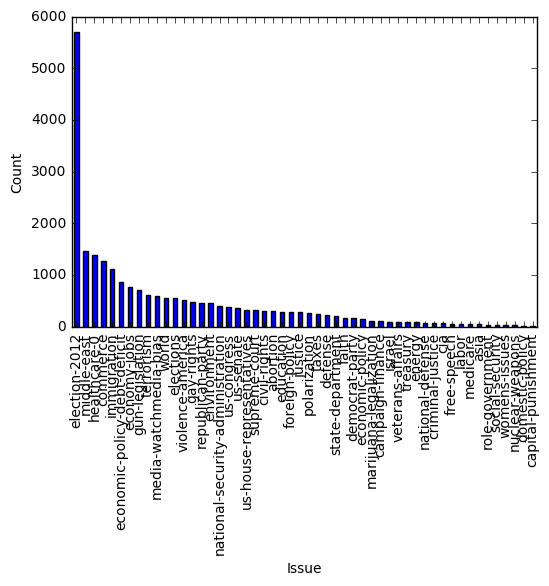

In [158]:
# political_lean_data.groupby('issue').political_lean.mean().plot(kind='bar')
political_lean_data.issue.value_counts().plot(kind='bar')
plt.xlabel('Issue')
plt.ylabel('Count')

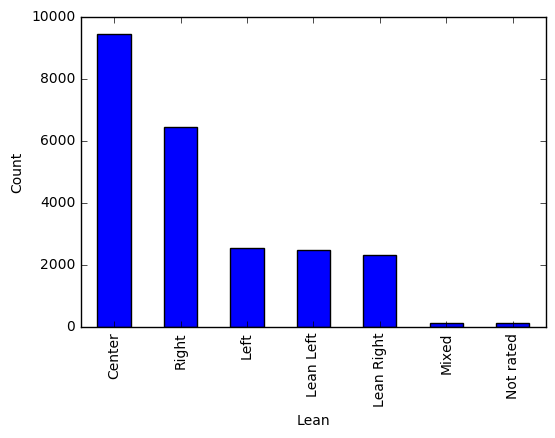

In [159]:
political_lean_data.political_lean.value_counts().plot(kind='bar')
plt.xlabel('Lean')
plt.ylabel('Count')

In [160]:
# political_lean_data['lean'] = political_lean_data.political_lean.map({'Left':1, 'Lean Left':0, 'Center':0, 'Lean Right':0, 'Right':0, 'Mixed':0})
political_lean_data['lean'] = political_lean_data.political_lean.map(lambda x: 1 if x == 'Left' else 0)
political_lean_data.head(10)

,url_raw,url_clean,url_domain,text,issue,political_lean,lean
0,https://www.washingtonpost.com/news/post-natio...,washingtonpost.com/news/post-nation/wp/2016/05...,washingtonpost.com,2 Desktop notifications are ...,abortion,Lean Left,0
1,http://www.salon.com/2016/04/07/camille_paglia...,salon.com/2016/04/07/camille_paglia_feminists_...,salon.com,\n\n\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t...,abortion,Left,1
2,http://www.vox.com/2016/3/20/11269226/texas-ab...,vox.com/2016/3/20/11269226/texas-abortion-wome...,vox.com,"\n \n \n\n(function(w,d,s,l,i){w[l]=w[l]...",abortion,Lean Left,0
3,http://www.huffingtonpost.com/entry/john-kasic...,huffingtonpost.com/entry/john-kasich-planned-p...,huffingtonpost.com,\n\n\n\r\nh2.mp_title { line-height: 1.0; marg...,abortion,Left,1
4,http://www.wsj.com/articles/hillary-clinton-an...,wsj.com/articles/hillary-clinton-and-donald-tr...,wsj.com,\n\n \n\n \n\n \n\n \n \n ...,abortion,Center,0
5,http://upr.org/post/different-interpretations-...,upr.org/post/different-interpretations-same-ab...,upr.org,\n \n skip to main content\n \n \n\n...,abortion,Center,0
6,http://2016election.procon.org/view.answers.el...,procon.org/view.answers.election.php,procon.org,\r\n\r\n\r\n\t\r\n\t\t\r\n \t\r\n ...,abortion,Mixed,0
7,http://2016election.procon.org/view.answers.el...,procon.org/view.answers.election.php,procon.org,\r\n\r\n\r\n\t\r\n\t\t\r\n \t\r\n ...,abortion,Mixed,0
8,http://www.foxnews.com/politics/2016/06/11/tru...,foxnews.com/politics/2016/06/11/trump-clinton-...,foxnews.com,"\n\t\n\n\n\n\tmboxCreate('FoxNews-Standard','...",abortion,Right,0
9,http://townhall.com/news/politics-elections/20...,townhall.com/news/politics-elections/2016/02/2...,townhall.com,\n\nÃ\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nColumn...,abortion,Right,0


In [161]:
simple_train = political_lean_data.head(5000)

In [162]:
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train.text).toarray(), columns=vect.get_feature_names())
tf.head()

,00,000,0000,00000,000000,0000000,00000000,00000005,00000008,00000009,...,ðºó,ð½ð,ð½ñ,ð¾ð,ð¾ò,õµõ,öø,ø³û,ø¹ø,ÿā
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# define X and y
X = simple_train.text
y = simple_train.lean

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices :: only single words
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use logistic regression with document feature matrix, NOT the text column
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
y_pred_proba = logreg.predict_proba(X_test_dtm)

# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.confusion_matrix(y_test, y_pred_class)
##Top Left: True Negatives 
##Top Right False Negatives 
##Bottom Left: False Positives 
##Bottom Right: True Positives 

0.9936
[[1111    0]
 [   8  131]]


In [121]:
print simple_train[simple_train.political_lean == 'Left'].political_lean.count() * 1.0 / simple_train.political_lean.count()

0.1236


In [163]:
political_lean_data.head()

,url_raw,url_clean,url_domain,text,issue,political_lean,lean
0,https://www.washingtonpost.com/news/post-natio...,washingtonpost.com/news/post-nation/wp/2016/05...,washingtonpost.com,2 Desktop notifications are ...,abortion,Lean Left,0
1,http://www.salon.com/2016/04/07/camille_paglia...,salon.com/2016/04/07/camille_paglia_feminists_...,salon.com,\n\n\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t...,abortion,Left,1
2,http://www.vox.com/2016/3/20/11269226/texas-ab...,vox.com/2016/3/20/11269226/texas-abortion-wome...,vox.com,"\n \n \n\n(function(w,d,s,l,i){w[l]=w[l]...",abortion,Lean Left,0
3,http://www.huffingtonpost.com/entry/john-kasic...,huffingtonpost.com/entry/john-kasich-planned-p...,huffingtonpost.com,\n\n\n\r\nh2.mp_title { line-height: 1.0; marg...,abortion,Left,1
4,http://www.wsj.com/articles/hillary-clinton-an...,wsj.com/articles/hillary-clinton-and-donald-tr...,wsj.com,\n\n \n\n \n\n \n\n \n \n ...,abortion,Center,0


In [166]:
political_lean_data['lean'] = political_lean_data.political_lean.map(lambda x: 0 if x == 'Left' else 1 if x == 'Lean Left' else 2 if x == 'Center' else 3 if x == 'Lean Right' else 4 if x == 'Right' else 5)
# code = {'Left': 0, 'Lean Left': 1, 'Center': 2, 'Lean Right': 3, 'Right': 4}
# political_lean_data['lean'] = political_lean_data['political_lean'].apply(lambda x: code[x])
political_lean_data.head(10)

,url_raw,url_clean,url_domain,text,issue,political_lean,lean
0,https://www.washingtonpost.com/news/post-natio...,washingtonpost.com/news/post-nation/wp/2016/05...,washingtonpost.com,2 Desktop notifications are ...,abortion,Lean Left,1
1,http://www.salon.com/2016/04/07/camille_paglia...,salon.com/2016/04/07/camille_paglia_feminists_...,salon.com,\n\n\t\n\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t\n\t...,abortion,Left,0
2,http://www.vox.com/2016/3/20/11269226/texas-ab...,vox.com/2016/3/20/11269226/texas-abortion-wome...,vox.com,"\n \n \n\n(function(w,d,s,l,i){w[l]=w[l]...",abortion,Lean Left,1
3,http://www.huffingtonpost.com/entry/john-kasic...,huffingtonpost.com/entry/john-kasich-planned-p...,huffingtonpost.com,\n\n\n\r\nh2.mp_title { line-height: 1.0; marg...,abortion,Left,0
4,http://www.wsj.com/articles/hillary-clinton-an...,wsj.com/articles/hillary-clinton-and-donald-tr...,wsj.com,\n\n \n\n \n\n \n\n \n \n ...,abortion,Center,2
5,http://upr.org/post/different-interpretations-...,upr.org/post/different-interpretations-same-ab...,upr.org,\n \n skip to main content\n \n \n\n...,abortion,Center,2
6,http://2016election.procon.org/view.answers.el...,procon.org/view.answers.election.php,procon.org,\r\n\r\n\r\n\t\r\n\t\t\r\n \t\r\n ...,abortion,Mixed,5
7,http://2016election.procon.org/view.answers.el...,procon.org/view.answers.election.php,procon.org,\r\n\r\n\r\n\t\r\n\t\t\r\n \t\r\n ...,abortion,Mixed,5
8,http://www.foxnews.com/politics/2016/06/11/tru...,foxnews.com/politics/2016/06/11/trump-clinton-...,foxnews.com,"\n\t\n\n\n\n\tmboxCreate('FoxNews-Standard','...",abortion,Right,4
9,http://townhall.com/news/politics-elections/20...,townhall.com/news/politics-elections/2016/02/2...,townhall.com,\n\nÃ\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nColumn...,abortion,Right,4


In [171]:
simple_train = political_lean_data.head(5000)

In [172]:
# define X and y
X = simple_train.text
y = simple_train.lean

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices :: only single words
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use logistic regression with document feature matrix, NOT the text column
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
y_pred_proba = logreg.predict_proba(X_test_dtm)

# calculate accuracy
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.confusion_matrix(y_test, y_pred_class)
##Top Left: True Negatives 
##Top Right False Negatives 
##Bottom Left: False Positives 
##Bottom Right: True Positives 

0.976
[[132   2   4   0   1   0]
 [  0 109   1   1   0   0]
 [  1   1 520   3   3   0]
 [  0   0   4 126   1   0]
 [  0   0   3   1 324   0]
 [  0   0   3   1   0   9]]
